In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy


### Importing Laliga Dataset & reading it

In [4]:
Laliga=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\Laliga.csv')
Laliga.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


### Importing Golf Dataset & reading it

In [5]:
Golf=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\Golf.csv')
Golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


## Ques1

1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:
1.	Which are the teams which started playing between 1930-1980?
2.	Which are the top 5 teams in terms of points?
3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)
4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.



### Replacing  the column names  with the 1st row

In [6]:

new_header=Laliga.iloc[0]
Laliga=Laliga[1:]
Laliga.columns=new_header

In [7]:
Laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [8]:
Laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 1 to 61
Data columns (total 20 columns):
Pos              61 non-null object
Team             61 non-null object
Seasons          61 non-null object
Points           61 non-null object
GamesPlayed      61 non-null object
GamesWon         61 non-null object
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Debut            61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null object
dtypes: object(20)
memory usage: 9.7+ KB


### Checking Values to verify occurence of Unwanted symbols

In [9]:

for i in Laliga.columns:
    print(i)
    print(Laliga[i].unique())

Pos
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61']
Team
['Real Madrid' 'Barcelona' 'Atletico Madrid' 'Valencia' 'Athletic Bilbao'
 'Sevilla' 'Espanyol' 'Real Sociedad' 'Zaragoza' 'Real Betis'
 'Deportivo La Coruna' 'Celta Vigo' 'Valladolid' 'Racing Santander'
 'Sporting Gijon' 'Osasuna' 'Malaga' 'Oviedo' 'Mallorca' 'Las Palmas'
 'Villarreal' 'Granada' 'Rayo Vallecano' 'Elche' 'Getafe' 'Hercules'
 'Tenerife' 'Murcia' 'Alaves' 'Levante' 'Salamanca' 'Sabadell' 'Cadiz'
 'Logrones' 'Castellon' 'Albacete' 'Almeria' 'Cordoba' 'Compostela'
 'Recreativo' 'Burgos CF' 'Pontevedra' 'Numancia' 'Eibar' 'Arenas'
 'Real Burgos' 'Gimnastic' 'Extremadura' 'Merida' 'Alcoyano' 'Jaen'
 'Real Union' 'AD Almeria' 'Europa' 'Lleida' 'Leganes' 'Xerez' 'Condal'


In [10]:
Laliga.columns

Index(['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut',
       'Since/LastApp', 'BestPosition'],
      dtype='object', name=0)

### Replacing selected columns values of '-' with '0'

In [11]:
v=['Points', 'GamesPlayed', 'GamesWon','GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst','Champion',  'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T']
for i in v:
    Laliga[i]=Laliga[i].replace({'-':'0'})

In [12]:
for j in v:
    print(Laliga[j].unique())

['4385' '4262' '3442' '3386' '3368' '2819' '2792' '2573' '2109' '1884'
 '1814' '1789' '1471' '1416' '1389' '1351' '1314' '1174' '1148' '1020'
 '970' '667' '662' '606' '553' '538' '510' '445' '421' '416' '375' '353'
 '343' '293' '285' '277' '242' '230' '190' '188' '168' '150' '148' '132'
 '107' '96' '91' '83' '81' '76' '71' '56' '52' '42' '40' '35' '34' '22'
 '19' '14' '0']
['2762' '2614' '2664' '2408' '2626' '2302' '1986' '1728' '1530' '1698'
 '1466' '1428' '1458' '1318' '1255' '1192' '988' '1096' '646' '742' '652'
 '678' '456' '628' '494' '586' '380' '402' '423' '426' '448' '346' '334'
 '270' '228' '282' '160' '186' '204' '180' '152' '114' '130' '116' '80'
 '108' '90' '72' '68' '54' '38' '30' '0']
['1647' '1581' '1241' '1187' '1209' '990' '948' '864' '698' '606' '563'
 '586' '463' '453' '471' '426' '390' '408' '333' '367' '266' '218' '189'
 '203' '147' '184' '155' '145' '125' '113' '123' '129' '104' '96' '103'
 '76' '62' '82' '52' '50' '59' '53' '37' '35' '43' '26' '34' '20' '19'
 '30

### Converting the datatypes to required formats

In [13]:
Laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 1 to 61
Data columns (total 20 columns):
Pos              61 non-null object
Team             61 non-null object
Seasons          61 non-null object
Points           61 non-null object
GamesPlayed      61 non-null object
GamesWon         61 non-null object
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Debut            61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null object
dtypes: object(20)
memory usage: 9.7+ KB


In [14]:
Laliga.columns
f=['Pos', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'BestPosition']
for i in f:
    Laliga[i]=Laliga[i].astype(float)

In [15]:
Laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 1 to 61
Data columns (total 20 columns):
Pos              61 non-null float64
Team             61 non-null object
Seasons          61 non-null float64
Points           61 non-null float64
GamesPlayed      61 non-null float64
GamesWon         61 non-null float64
GamesDrawn       61 non-null float64
GamesLost        61 non-null float64
GoalsFor         61 non-null float64
GoalsAgainst     61 non-null float64
Champion         61 non-null float64
Runner-up        61 non-null float64
Third            61 non-null float64
Fourth           61 non-null float64
Fifth            61 non-null float64
Sixth            61 non-null float64
T                61 non-null float64
Debut            61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null float64
dtypes: float64(17), object(3)
memory usage: 9.7+ KB


In [16]:
for i in Laliga['Debut']:
    Laliga['Debut']=Laliga['Debut'].replace({i:i[0:4]})
    
    

In [17]:
print(Laliga['Debut'].unique())

['1929' '1931' '1934' '1939' '1932' '1941' '1948' '1944' '1935' '1949'
 '1933' '1960' '1951' '1998' '1977' '1959' '2004' '1961' '1940' '1930'
 '1963' '1974' '1943' '1987' '1991' '2007' '1962' '1994' '1978' '1971'
 '1999' '2014' '1990' '1947' '1996' '1995' '1945' '1953' '1979' '1950'
 '2016' '2009' '1956' '1955' '2017']


In [18]:
Laliga['Debut']=Laliga['Debut'].astype(float)

Hence we have done the following changes above-

1)'Points', 'GamesPlayed', 'GamesWon','GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst','Champion',  'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T'
  These columns had '-' symbol and we replaced them with 0 which was the most appropriate replacement considering it is a numeric column & computation with 0 is easier.

2) Also we find that we convert most columns with Numbers to float inorder to do computations.

3)For ease of calculation,we have converted Debut season to Debut year to take a particular year of debut of the team in Laliga .
    Although Laliga is played in season format,year gives the same answer with also easy calculations.

Our data is ready to be computed now!!!!

In [19]:
# A)Which are the teams which started playing between 1930-1980?
Laliga.head()
Laliga[(Laliga['Debut']>1929)&(Laliga['Debut']<1981)][['Team','Debut']].sort_values(by='Debut',ascending=True)

,Team,Debut
29,Alaves,1930.0
4,Valencia,1931.0
10,Real Betis,1932.0
18,Oviedo,1933.0
6,Sevilla,1934.0
26,Hercules,1935.0
16,Osasuna,1935.0
9,Zaragoza,1939.0
12,Celta Vigo,1939.0
28,Murcia,1940.0


In [20]:
#B)Which are the top 5 teams in terms of points?
Laliga.sort_values(by='Points',ascending=False)[0:5][['Team','Points']]

,Team,Points
1,Real Madrid,4385.0
2,Barcelona,4262.0
3,Atletico Madrid,3442.0
4,Valencia,3386.0
5,Athletic Bilbao,3368.0


In [21]:
#C)What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)
Laliga.head()
Laliga['Winning_Percentage']=(Laliga['GamesWon']/Laliga['GamesPlayed'])*100

In [22]:
## REplacing Nan value with Numeric value for Girona
Laliga['Winning_Percentage']=Laliga['Winning_Percentage'].replace({np.nan:0})

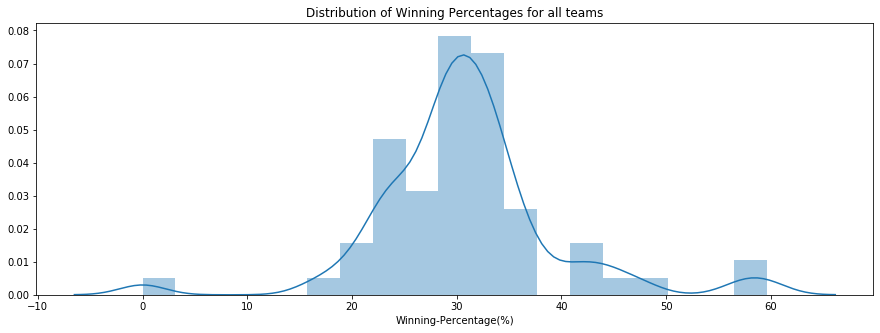

In [23]:
plt.subplots(figsize=(15,5))
sns.distplot(Laliga['Winning_Percentage'])
plt.title('Distribution of Winning Percentages for all teams')
plt.xlabel('Winning-Percentage(%)')
plt.show()

In [24]:
Top5=Laliga.sort_values(by='Winning_Percentage',ascending=False)[0:5][['Team','Winning_Percentage']]
Top5

,Team,Winning_Percentage
1,Real Madrid,59.630702
2,Barcelona,57.241130
3,Atletico Madrid,47.475134
4,Valencia,44.557057
5,Athletic Bilbao,43.772629


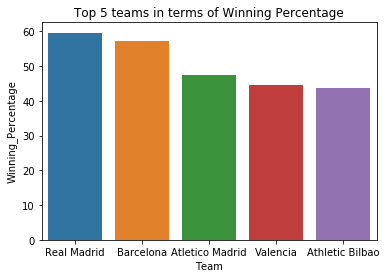

In [25]:
sns.barplot(x=Top5['Team'],y=Top5['Winning_Percentage'])
plt.title('Top 5 teams in terms of Winning Percentage')
plt.show()

In [26]:
#D)Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and 
#those teams which have had a best position between 4-7
Laliga.head()
Top3=Laliga[(Laliga['BestPosition']>=1)&(Laliga['BestPosition']<=3)][['Winning_Percentage','Team','BestPosition']]
Top4_7=Laliga[(Laliga['BestPosition']>=4)&(Laliga['BestPosition']<=7)][['Winning_Percentage','Team','BestPosition']]

In [27]:
## DataFrame Having Top3 teams as per BestPositions
Top3.head()

,Winning_Percentage,Team,BestPosition
1,59.630702,Real Madrid,1.0
2,57.241130,Barcelona,1.0
3,47.475134,Atletico Madrid,1.0
4,44.557057,Valencia,1.0
5,43.772629,Athletic Bilbao,1.0


In [28]:
## DataFrame Having Top4-7 teams as per BestPositions
Top4_7.head()

,Winning_Percentage,Team,BestPosition
12,34.511190,Celta Vigo,4.0
13,31.582538,Valladolid,4.0
16,32.321700,Osasuna,4.0
17,31.075697,Malaga,4.0
22,29.380054,Granada,6.0


### H0:Null Hypothesis- There is no significant difference between winning percentage of the two types of teams
### Ha:Alternate Hypothesis-There is a significant difference between winning percentage of the two types of teams


In [29]:
from scipy.stats import ttest_ind
stats.ttest_ind(Top3['Winning_Percentage'],Top4_7['Winning_Percentage'])

Ttest_indResult(statistic=4.992715339447283, pvalue=1.5362101870160483e-05)

### Hence as we took 5% Level of significance ,we have our pvalue<0.05 we reject our null hypothesis.
### Hence we confirm that there is a significant difference in the winning percentage of the teams who have had their Bestposition in 1-3 and teams whose best position lies between 4-7.

## Ques2


2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?
b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.
c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?
d)	Which of the two above intervals are wider?
e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.




In [30]:
xbar=140 #Sample mean as per question
sigma=25 #Sample standard deviation
n=200    # Sample size


In [31]:
##a)
Std_Error=sigma/np.sqrt(n)
print("Estimated Standard Error=",Std_Error)


Estimated Standard Error= 1.7677669529663687


Hence we see that Standard error indicates standard deviation of the Sampling distribution.In Statistical terms,standard error of the mean is the measure of dispersion around population mean

In [32]:
#B)
CI=stats.norm.interval(0.95,loc=xbar,scale=Std_Error)
print("Hence 95% Confidence Interval of for the true mean blood pressure for all 60-year old women with glaucoma of sample size=200 is ")
print(CI)

Hence 95% Confidence Interval of for the true mean blood pressure for all 60-year old women with glaucoma of sample size=200 is 
(136.5352404391258, 143.4647595608742)


In [33]:
#C)
n=100# Here we assume that sample size=100 instead of 200
xbar=140
sigma=25
se=sigma/np.sqrt(n)
CI_new=stats.norm.interval(0.95,loc=xbar,scale=se)
print("Hence 95% Confidence Interval of for the true mean blood pressure for all 60-year old women with glaucoma of sample size=100 is ")
print(CI_new)

Hence 95% Confidence Interval of for the true mean blood pressure for all 60-year old women with glaucoma of sample size=100 is 
(135.10009003864985, 144.89990996135015)


D)
Comparing Ranges of the 2 Confidence Intervals of Sample size=200 & 100 respectively,we find that the range of Confidence interval of size=100 is wider than size=200.

E)
  Reasons why the estimated standard error of a sample mean tends to decrease with an increase in sample size are:-
  
    1) According to the Central Limit theorem,if the population distribution is normal and we need to achieve that,
    then the sample means of the sampling points are also having a normal distribution.
    To achieve that,we need to increase the number of sampling points to achieve that normal distribution.
    Hence it is proven that if number of sample points are increased,means 
    we are able to achieve the data and prediction of the population is easier & more accurate.

  2) Secondly,Standard_error=Standard_Deviation/Square_root(Sample size)
     Here also we see that if the sample size increases,means the Error reduces significantly.
     Here we are more accurately predicting the population values

## Ques3

3. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.

1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.
2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?


In [34]:
Golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [35]:
Golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [36]:
Golf.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [ ]:
#1)Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.
Ho:Null Hypothesis- The driving distances of the current balls & the new balls is same.Hence no difference among them.
Ha:Alternate Hypothesis- Their is significant difference among the driving distances of the current & the new balls.

In [38]:
#2)Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
from scipy.stats import ttest_rel
s,p=stats.ttest_rel(Golf['Current'],Golf['New'])
print('P-value for the test=',p)

P-value for the test= 0.20916361823147053


Hence we see that with 5% significance level,we see that p-value>0.05.Hence we do not have sufficient evidence to reject null hypothesis.

As Par Inc. would have  liked the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball,we see the results of coating are fruitful.

Firstly,the coating has increased the durability of the new balls,making it more long-lasting.
Secondly & more importantly,the distance tests are same of the new balls as compared to the old balls.
Meaning although having little extra weight of coating,the distance covered by the golf ball in the golf course is almost same.

Hence by statistical tests, we conclude that Par Inc can go ahead with the new balls.

In [ ]:
#3)What is the 95% confidence interval for the population mean of each model, 
#and what is the 95% confidence interval for the difference between the means of the two population?

#### 95% confidence interval for Current balls

In [39]:
Mean_current=np.mean(Golf['Current'])
SD_current=np.std(Golf['Current'],ddof=1)
n=Golf.shape[0]
SE_current=(SD_current)/(np.sqrt(n))
CI_current=stats.t.interval(0.95,df=n-1,loc=Mean_current,scale=SE_current)
print("95% Confidence Interval of Current balls=",CI_current)

95% Confidence Interval of Current balls= (267.47565965314044, 273.0743403468595)


#### 95% confidence interval of new balls

In [40]:
Mean_new=np.mean(Golf['New'])
SD_new=np.std(Golf['New'],ddof=1)
n=Golf.shape[0]
SE_new=(SD_new)/(np.sqrt(n))
CI_new=stats.t.interval(0.95,df=n-1,loc=Mean_new,scale=SE_new)
print("95% Confidence Interval of New balls=",CI_new)

95% Confidence Interval of New balls= (264.33481641038986, 270.66518358961014)


#### 95% confidence interval for the difference between the means of the two population

In [41]:
Mean_diff=np.mean(Golf['New']-Golf['Current'])
SD_diff=np.std((Golf['New']-Golf['Current']),ddof=1)
n=Golf.shape[0]
SE_diff=(SD_diff)/(np.sqrt(n))
CI_diff=stats.t.interval(0.95,df=n-1,loc=Mean_diff,scale=SE_diff)
print("95% Confidence Interval of difference between the means of the two population¶=",CI_diff)

95% Confidence Interval of difference between the means of the two population¶= (-7.1705358040563745, 1.620535804056375)


## THE END